In [ ]:
# 필요한 라이브러리 설치
!pip install torch torchvision

# 간단한 Faster-R-CNN 실습

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 151MB/s]


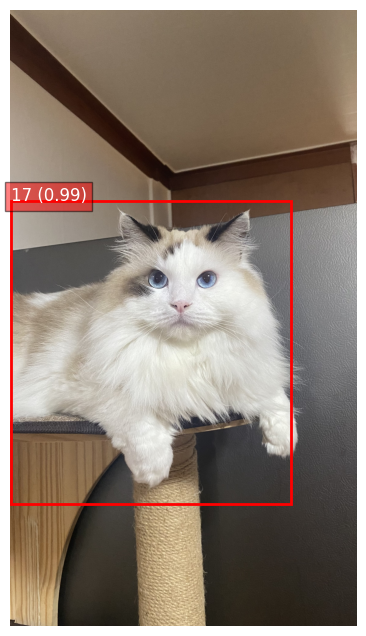

In [1]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 1. 사전 학습된 Faster R-CNN 모델 불러오기
# torchvision 라이브러리에서 COCO 데이터셋으로 사전 학습된 Faster R-CNN 모델을 불러오기
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # 평가 모드로 설정하여 추론만 진행

# 2. 이미지 전처리 함수 정의
# Faster R-CNN은 이미지의 크기나 색상값을 일정한 형식으로 전처리해야 하므로, 이를 위한 변환을 정의
def transform_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = T.Compose([
        T.ToTensor(),  # 이미지를 Tensor로 변환
    ])
    return transform(image)

# 3. 객체 검출 함수 정의
# 입력 이미지에서 객체를 검출하고, 결과를 출력하는 함수
def detect_objects(image_path):
    # 이미지 전처리
    image = transform_image(image_path)
    # 모델에 입력할 수 있도록 배치 차원을 추가합니다.
    image = image.unsqueeze(0)

    # 객체 검출 실행
    with torch.no_grad():  # 추론 과정에서의 메모리 사용을 최적화하기 위해 gradient를 계산하지 않음
        predictions = model(image)

    # 예측 결과에서 필요한 정보 추출
    boxes = predictions[0]['boxes']  # 객체의 경계 상자
    labels = predictions[0]['labels']  # 객체 클래스 레이블
    scores = predictions[0]['scores']  # 신뢰도 점수

    return boxes, labels, scores

# 4. 결과 시각화 함수 정의
# 객체 검출 결과를 시각적으로 보여주기 위해, 원본 이미지에 경계 상자를 그려 출력하는 함수
def plot_detections(image_path, boxes, labels, scores, threshold=0.8):
    image = Image.open(image_path)
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    ax = plt.gca()

    # 객체마다 경계 상자를 그림
    for box, label, score in zip(boxes, labels, scores):
        if score >= threshold:  # 신뢰도 점수가 임계값 이상일 때만 표시
            xmin, ymin, xmax, ymax = box
            rect = patches.Rectangle(
                (xmin, ymin), xmax - xmin, ymax - ymin,
                linewidth=2, edgecolor='r', facecolor='none'
            )
            ax.add_patch(rect)
            ax.text(xmin, ymin, f'{label.item()} ({score:.2f})',
                    color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.show()

# 5. 테스트할 이미지 경로 설정 (Colab에서 이미지를 업로드하고 경로를 설정)
image_path = "/content/IMG_4685.jpeg"  # 검출하고자 하는 이미지 경로

# 6. 객체 검출 실행 및 시각화
boxes, labels, scores = detect_objects(image_path)
plot_detections(image_path, boxes, labels, scores)
